In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Linear interpolation from Herald:
# https://github.com/theheraldproject/herald-for-ios/blob/develop/Herald/Herald/Sensor/Analysis/Algorithms/Distance/SmoothedLinearModel.swift
intercept = -17.102080
coefficient = -0.266793
def linear_fun(rssi):
    return intercept + coefficient * rssi

# Calculate rssi at which the distance is 3 meters using Herald model
d0 = 3
rssi0 = (d0 - intercept) / coefficient
print(rssi0)

# Loss path exponent, reasonable values for indoor are between 2 and 3.
# See see Empirical coefficient values for indoor propagation in:
# https://en.wikipedia.org/wiki/Log-distance_path_loss_model
# or Table 4 in:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5461075/
lpe = 3

# Log-distance path loss model, see for example equation 6 in:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5461075/
def logloss_fun(rssi):
    exponent = -(rssi - rssi0) / (10 * lpe)
    return d0 * np.power(10, exponent)

-75.34710430933346


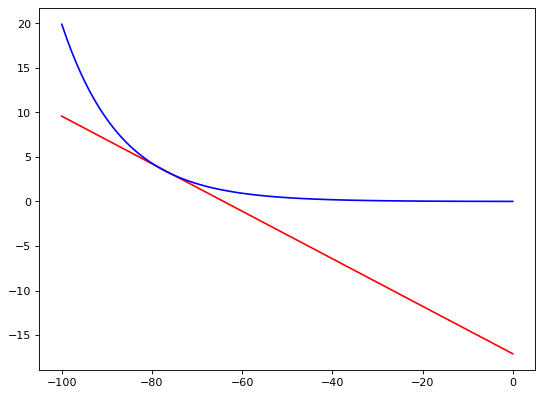

In [3]:
figure(figsize=(8, 6), dpi=80)

x = np.linspace(-100, 0, 100)
plt.plot(x, linear_fun(x), color='red')
plt.plot(x, logloss_fun(x), color='blue')

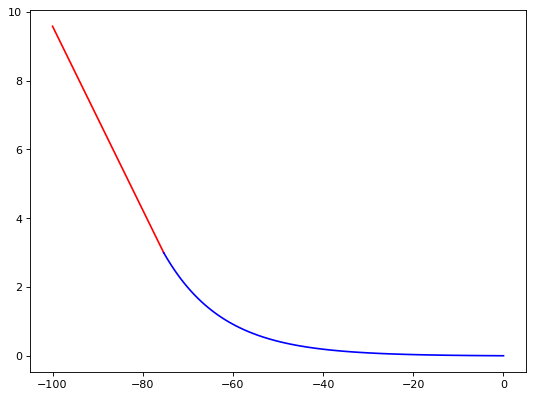

In [4]:
figure(figsize=(8, 6), dpi=80)

x1 = np.linspace(-100, rssi0, 100)
x2 = np.linspace(rssi0, 0, 100)

plt.plot(x1, linear_fun(x1), color='red')
plt.plot(x2, logloss_fun(x2), color='blue')